In [1]:
import numpy as np

from torch_traj_utils.load_training_dataset import load_dataset_np
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [2]:
os.getcwd()

'/home/sjohnson/cartpole_nn/notebooks'

In [24]:
x,y,z,id,od=load_dataset_np("../scripts/trajectories_big_2_training.npz")

(164710, 4) (164710, 1) (2353, 4)


In [25]:
x.shape

(164710, 4)

In [26]:
df = pd.DataFrame(x,columns=['x','theta','xdot','thetadot'])

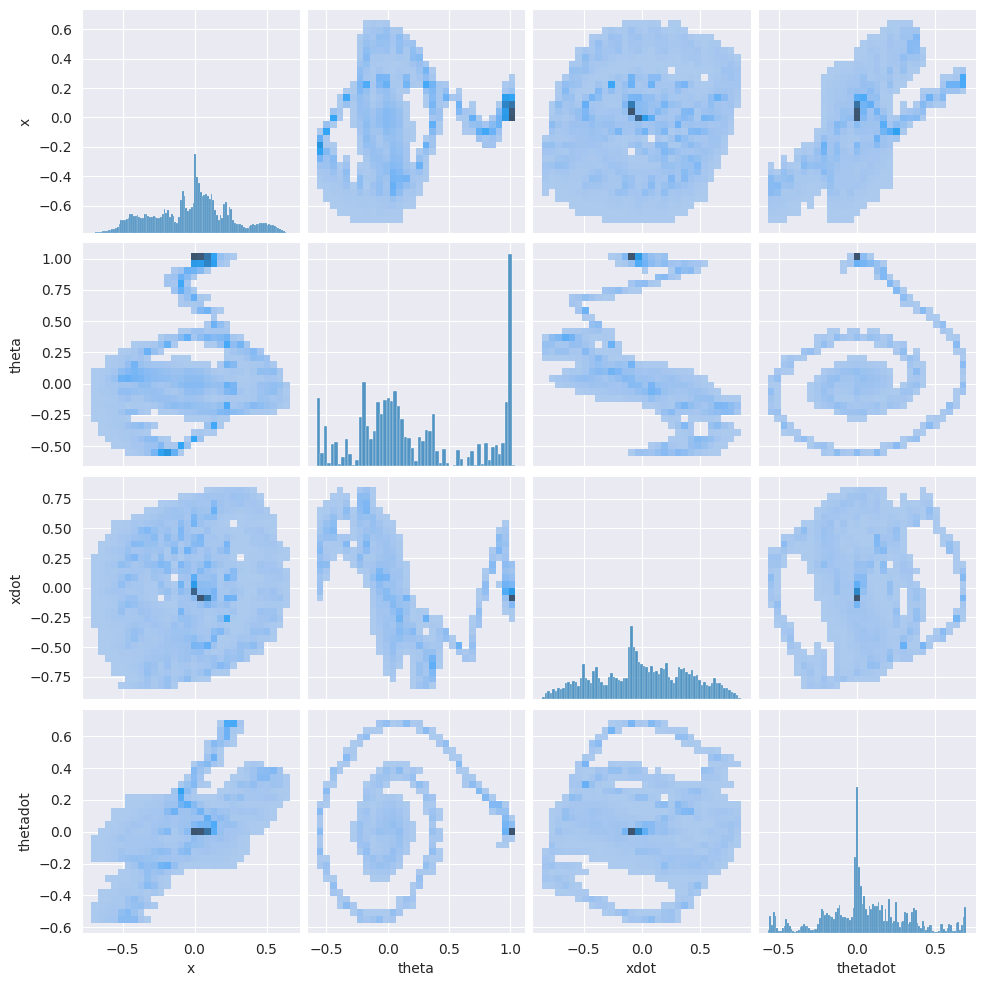

In [27]:
sn.pairplot(df, kind="hist", plot_kws={"bins": 30})

In [28]:
xy = np.hstack((x,y))

In [30]:
df_xy = pd.DataFrame(xy,columns=['x','theta','xdot','thetadot','u'])

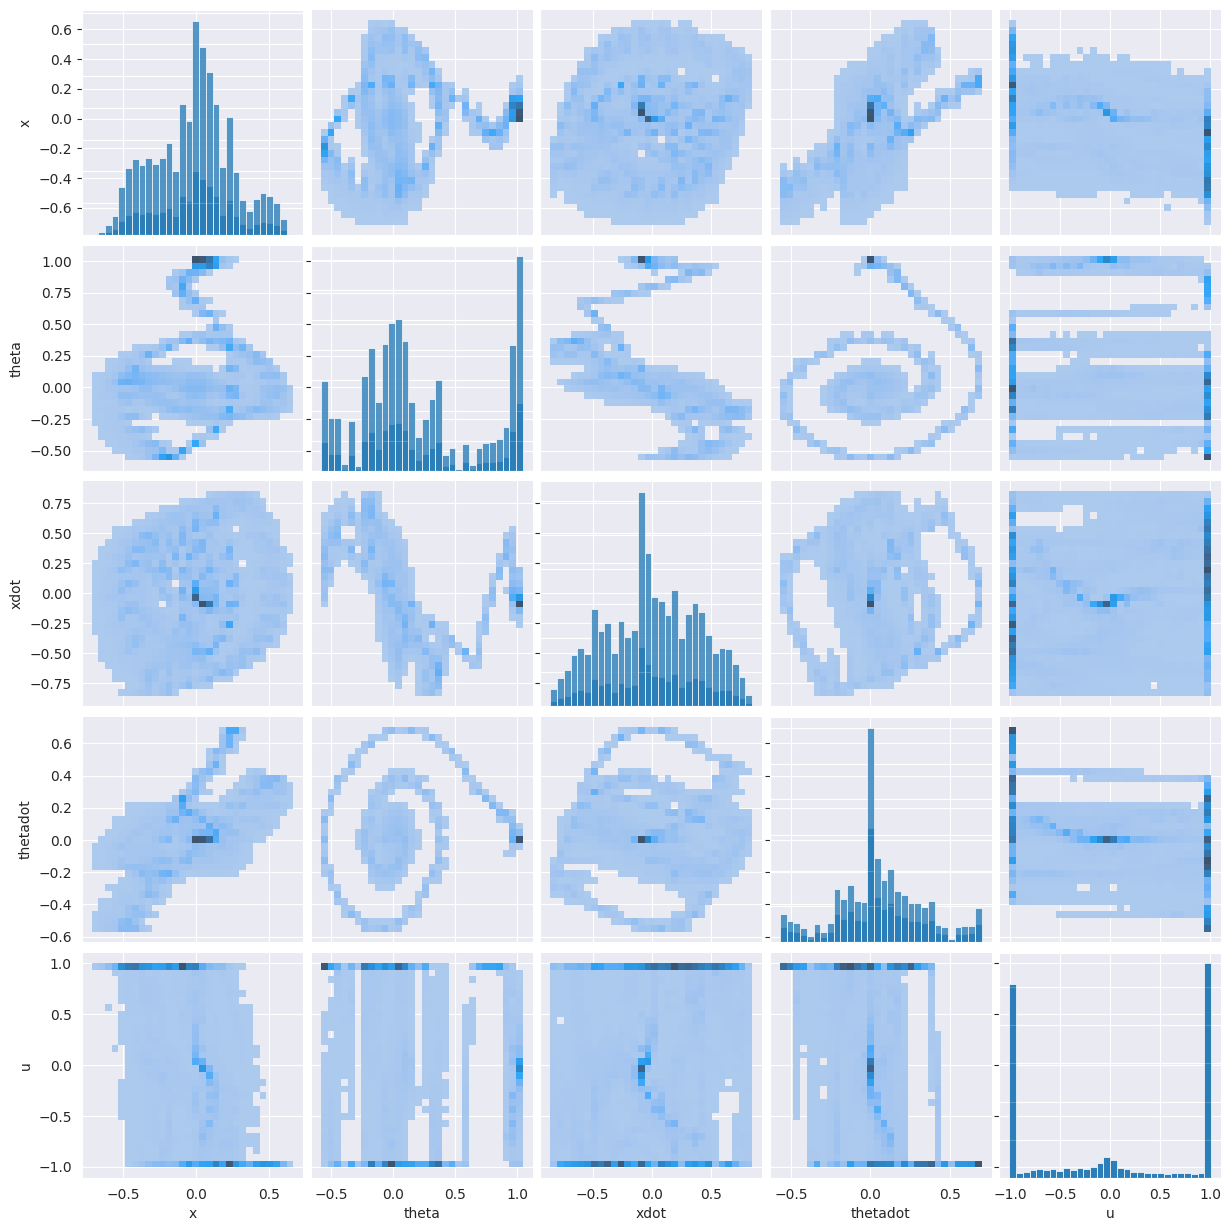

In [31]:
g = sn.pairplot(df_xy, kind="hist", diag_kind="hist", diag_kws={"bins": 30}, plot_kws={"bins": 30})
# seaborn's diagonal histograms are broken
# Replace each diagonal plot with an independent-y "twin" axis
cols = df_xy.columns

for i, col in enumerate(cols):
    ax = g.axes[i, i]

    # Grab x-limits before we mess with anything
    xlim = ax.get_xlim()

    # Create independent y axis that shares x
    ax2 = ax.twinx()

    # Remove existing artists *without* clearing the axis object
    # histplot/hist can populate patches and sometimes collections
    for p in list(ax.patches):
        p.remove()
    for c in list(ax.collections):
        c.remove()
    for ln in list(ax.lines):
        ln.remove()

    # Plot the diagonal histogram onto the twin axis
    sn.histplot(df_xy[col], bins=30, stat="count", ax=ax2)

    # # Make it look like a normal left-y-axis plot
    # ax2.yaxis.set_ticks_position("left")
    # ax2.yaxis.set_label_position("left")
    ax2.set_ylabel("")                          # remove "Count" label
    ax2.tick_params(right=False, labelright=False)
    ax2.spines["right"].set_visible(False)

    # Keep the x-limits consistent with the grid
    ax2.set_xlim(xlim)


plt.show()


In [10]:
# a wee bit of clustering
import umap

/home/sjohnson/cartpole_nn/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
reducer = umap.UMAP(
    n_neighbors=30,      # try 15–50
    min_dist=0.05,       # small = sharper clusters
    n_components=2,
    metric="euclidean",
    random_state=0,
)

In [12]:
Z_emb = reducer.fit_transform(xy)

/home/sjohnson/cartpole_nn/venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/sjohnson/cartpole_nn/venv/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:373: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


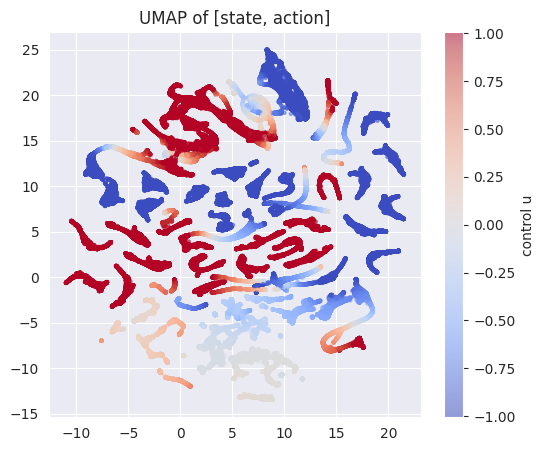

In [13]:
plt.figure(figsize=(6, 5))
plt.scatter(Z_emb[:, 0], Z_emb[:, 1],
            s=5, alpha=0.5, c=y.squeeze(),
            cmap="coolwarm")
plt.colorbar(label="control u")
plt.title("UMAP of [state, action]")
plt.show()

In [14]:
umax = np.max(np.abs(np.squeeze(y)))
eps = 0.9 * umax
labels = np.zeros_like(np.squeeze(y), dtype=int)
labels[np.squeeze(y) >  eps] =  1
labels[np.squeeze(y) < -eps] = -1
uv, cts = np.unique(labels,return_counts=True)
print(umax)
print(uv)
print(cts)
print(cts/np.sum(cts))


1.005898580775782
[-1  0  1]
[43268 46025 47907]
[0.31536443 0.33545918 0.34917638]


In [15]:
from sklearn.neighbors import NearestNeighbors
k = 25
nbrs = NearestNeighbors(n_neighbors=k).fit(x)
idx = nbrs.kneighbors(return_distance=False)

consistency = ((y[idx]-y[:,None])<=0.05).mean(axis=1)
#consistency = (labels[idx]==labels[:,None]).mean(axis=1)
print("Mean kNN label consistency:", consistency.mean())

Mean kNN label consistency: 0.9324151603498542


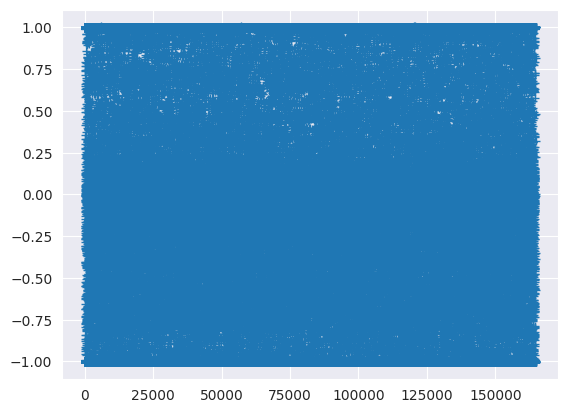

1.0058379874230001

In [33]:
plt.figure()
plt.plot(y, '+')
plt.show()
np.max(y)

In [35]:
stuff = np.load("../scripts/trajectories_big_2_training.npz")

In [36]:
stuff["third_array"].shape

(2353, 4)

In [37]:
stuff["first_array"].shape

(164710, 4)

In [38]:
stuff["first_array"].shape[0]/stuff["third_array"].shape[0]

70.0

In [39]:
3.5*20

70.0